# Comparative study of Geomstat & PyRiemann frameworks

We compare the 2 frameworks on differents datasets for different metrics, and plot both classification scores and computation time.

### Imports

In [12]:
import warnings

import time
import resource 
import numpy as np
import pandas as pd
import yaml
from memory_profiler import profile

import mne


# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline
from sklearn.pipeline import make_pipeline
from mne.decoding import CSP

# Dimension reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Covariance estimation
from mne import Covariance as mne_cov
from pyriemann.estimation import Covariances as pyr_cov
from pyriemann.estimation import XdawnCovariances as pyr_xdawn_cov

# Transformations
from pyriemann.tangentspace import TangentSpace as pyr_ts
from geomstats.learning.preprocessing import ToTangentSpace as geo_ts

# Metrics
from geomstats.geometry.spd_matrices import SPDMetricLogEuclidean
from geomstats.geometry.riemannian_metric import RiemannianMetric

# Classification algorithms
from pyriemann.classification import MDM
from sklearn.svm import SVC



# Framework
import moabb
from moabb.datasets import AlexMI, BNCI2014001, BNCI2014002, BNCI2014004, BNCI2015001, BNCI2015004, Cho2017, Lee2019_MI, MunichMI, Ofner2017, PhysionetMI, Schirrmeister2017, Shin2017A, Shin2017B, Weibo2014, Zhou2016
from moabb.evaluations import WithinSessionEvaluation, CrossSessionEvaluation, CrossSubjectEvaluation
from moabb.paradigms import MotorImagery

In [8]:
moabb.set_log_level("info")
warnings.filterwarnings("ignore")


In [9]:
def read_yaml(yaml_path):
    """Open and read safely a yaml file."""
    with open(yaml_path, 'r') as stream:
        try:
            parameters = yaml.safe_load(stream)
        except :
            print("Couldn't load yaml file: {}.".format(yaml_path))
            quit()
    return parameters


#@profile(precision=4)
#@performance_evaluation

def performance_evaluation(f):
    """Evaluate computation time and memory usage.
    """
    time_start = time.perf_counter()
    def tmp(*args, **kwargs):
        result = f(*args, **kwargs)
        return result
    time_elapsed = (time.perf_counter() - time_start)
    print ("%5.1f secs" % (time_elapsed))
    return tmp

@profile(precision=4)
@performance_evaluation
def evaluate_pipeline(evaluator, pipelines):
    return evaluator.process(pipelines)

  0.0 secs


In [ ]:
# creating LNE estimator

def class Mne_cov(BaseEstimator):
    
    def __init__(self):
        
    mne_cov

### Datasets preprocessing

Filtering or/& dimensions reduction:

Computing covariances matrices:

In [67]:
data = raw.get_data()
(Ne, Ns) = data.shape
data = data.reshape(1, Ne, Ns) # introduce Number of trials dimension
m = Covariances().fit_transform(data)

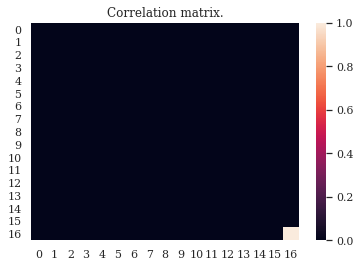

In [68]:
sns.heatmap(np.squeeze(m), vmin=0, vmax=1)

plt.title("Correlation matrix.")
plt.show()

### Paradigm

In [10]:
#paradigm = MotorImagery(
#    events=list(dataset.event_id.keys()), 
#    n_classes=3,
#    fmin=8,
#    fmax=25,
#    tmin=0,
#    tmax=3,
#    baseline=None,
#    channels=None
#)
paradigm = MotorImagery()

### Creating Pipelines

#### Comparing covariance computation

In [25]:
pipelines = {}
datasets = [AlexMI(), BNCI2014001(), BNCI2014002()]
pipelines["mne_cov+MDM"] = make_pipeline(mne_cov, MDM(metric="riemann"))
pipelines["pyr_cov+MDM"] = make_pipeline(pyr_cov(), MDM(metric="riemann"))
pipelines["pyr_xdawn_cov+MDM"] = make_pipeline(pyr_xdawn_cov(), MDM(metric="riemann"))
evaluation_within_session = WithinSessionEvaluation(
    paradigm=paradigm,
    datasets=datasets,
    overwrite=True,
    hdf5_path=None,
)
results_within_session = evaluation_within_session.process(pipelines)


TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '<class 'mne.cov.Covariance'>' (type <class 'type'>) doesn't

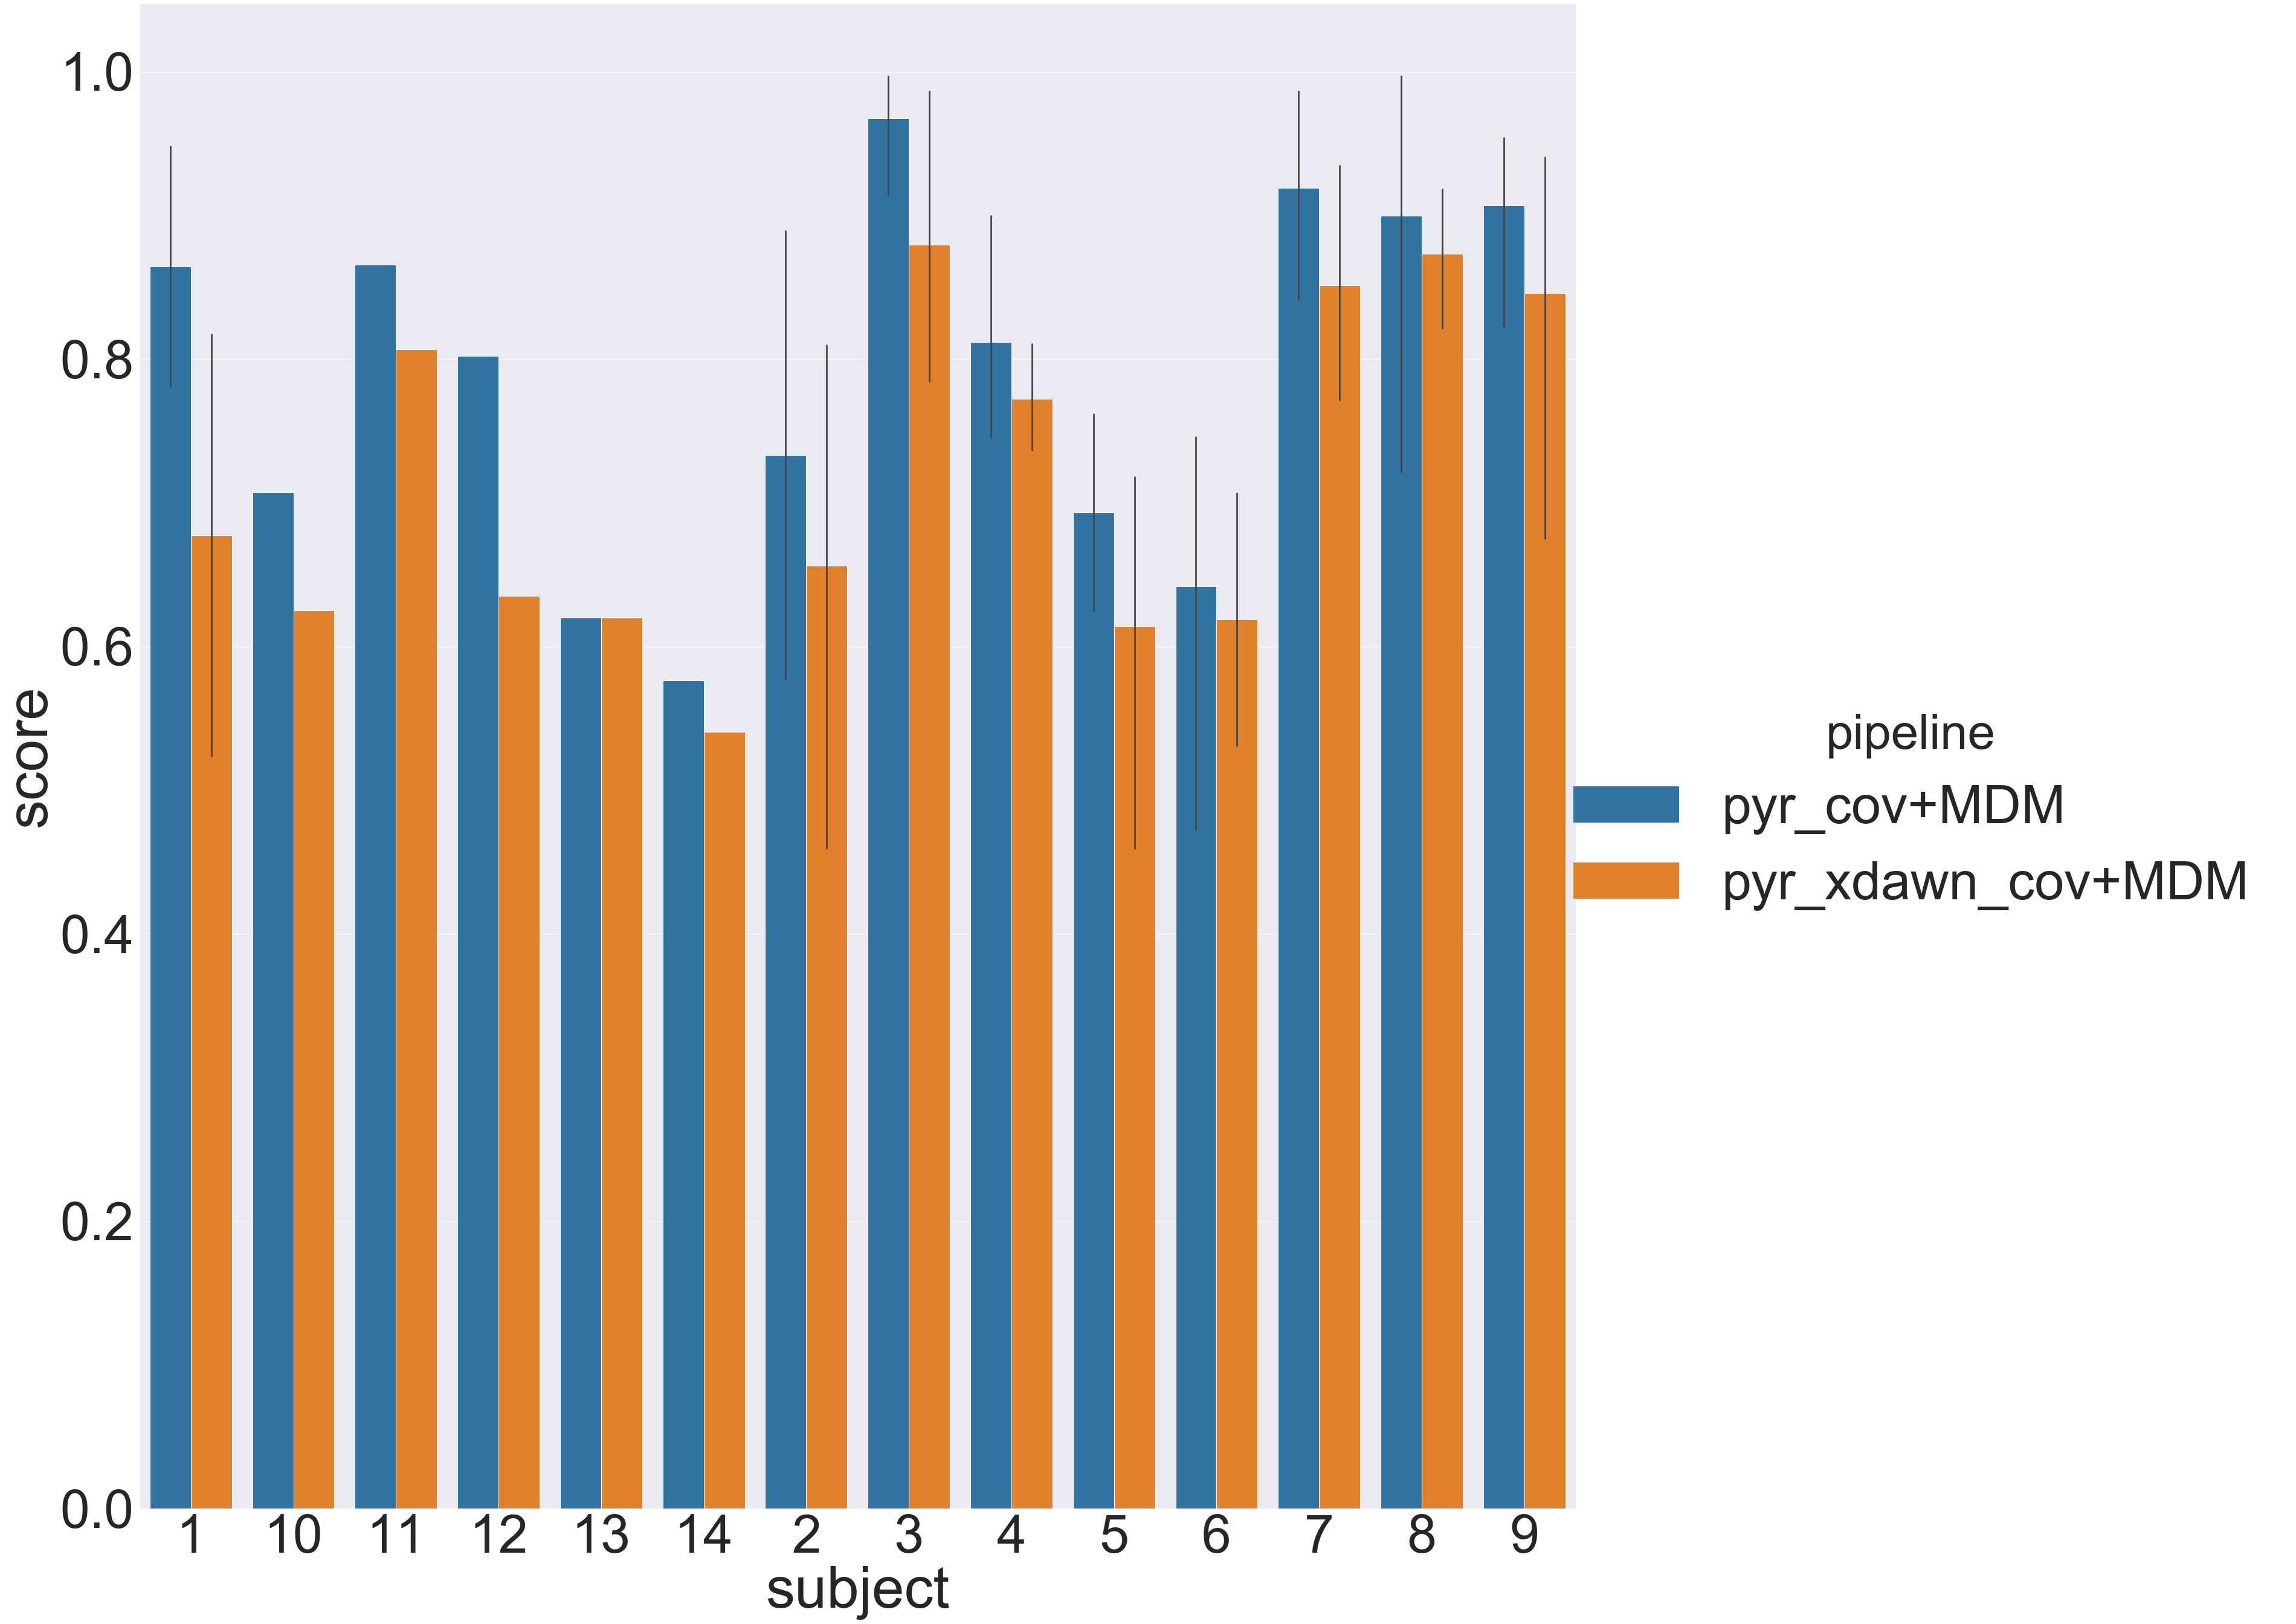

In [24]:
plot(results_within_session)

#### Comparing metrics & classification technics

#### Comparing computation times for best models

#### Comparing best models with different preprocessing

In [163]:

#nfilter = 4
#xdwn = XdawnCovariances(estimator='scm', nfilter=nfilter)
#split = train_test_split(X, y, train_size=0.25, random_state=42)
#Xtrain, Xtest, ytrain, ytest = split
#covs = xdwn.fit(Xtrain, ytrain).transform(Xtest)
#
#lapl = Embedding(metric='riemann', n_components=2)
#embd = lapl.fit_transform(covs)
#

#pipelines["pyr_xdawn_cov+MDM"] = make_pipeline(pyr_xdawn_cov(), MDM(metric="riemann"))
pipelines["pyr_cov+TS-logeuclid+SVC"] = make_pipeline(pyr_cov(), TangentSpace(metric="logeuclid"), SVC(kernel="linear"))
pipelines["pyr_cov+geo_TS-log-eucli-25+SVC"] = make_pipeline(pyr_cov(),  ToTangentSpace(geometry=SPDMetricLogEuclidean(25)), SVC(kernel="linear"))
#pipelines["pyr_cov+geo_TS-rieman+SVC"] = make_pipeline(pyr_cov(), ToTangentSpace(geometry=RiemannianMetric(25)), SVC(kernel="linear"))


#pipelines["mne_cov+MDM"] = make_pipeline(mne_cov, MDM(metric="riemann"))
pipelines["pyr_xdawn_cov+MDM"] = make_pipeline(pyr_xdawn_cov(), MDM(metric="riemann"))
pipelines["pyr_cov+MDM"] = make_pipeline(pyr_cov(), MDM(metric="riemann"))


### Evaluation

In [ ]:
evaluation_within_session = WithinSessionEvaluation(
    paradigm=paradigm,
    datasets=datasets,
    overwrite=True,
    hdf5_path=None,
)

evaluation_cross_session = CrossSessionEvaluation(
    paradigm=paradigm,
    datasets=datasets,
    overwrite=True,
    hdf5_path=None,
)

evaluation_cross_subject = CrossSubjectEvaluation(
    paradigm=paradigm,
    datasets=datasets,
    overwrite=True,
    hdf5_path=None,
)


In [ ]:

results_within_session = evaluation_within_session.process(pipelines)
results_cross_session = evaluation_cross_session.process(pipelines)
results_cross_subject = evaluation_cross_subject.process(pipelines)a


In [ ]:
for pipeline in pipelines.keys():
    results_within_session = evaluate_pipeline(evaluation_within_session, pipelines[pipeline])
    results_cross_session = evaluate_pipeline(evaluation_cross_session, pipelines[pipeline])
    results_cross_subject = evaluate_pipeline(evaluation_cross_subject, pipelines[pipeline])

### Plotting results

In [23]:
def plot(results, kind="bar", y="score", x="subject", hue="pipeline", palette="tab10", height=40):
    sns.set(font_scale = 8)
    g = sns.catplot(
        kind=kind,
        y=y,
        x=x,
        hue=hue,
        data=results,
        #orient="h",
        palette=palette,
        height=height, 
    )
    #g.set_xticklabels(plt.get_xticklabels(), fontsize = 18)
    plt.show()

### Sandbox

As a sample dataset, we use:
- moabb.datasets.AlexMI



This Dataset contains EEG recordings from 8 subjects, performing 2 task of motor imagination (right hand, feet or rest). Data have been recorded at 512Hz with 16 wet electrodes (Fpz, F7, F3, Fz, F4, F8, T7, C3, Cz, C4, T8, P7, P3, Pz, P4, P8) with a g.tec g.USBamp EEG amplifier.

File are provided in MNE raw file format. A stimulation channel encoding the timing of the motor imagination. The start of a trial is encoded as 1, then the actual start of the motor imagination is encoded with 2 for imagination of a right hand movement, 3 for imagination of both feet movement and 4 with a rest trial.

The duration of each trial is 3 second. There is 20 trial of each class.


In [ ]:
dataset_list = read_yaml('datasets.yml')
datasets_names = [list(i.keys())[0] for i in dataset_list['motor_imagery_datasets']]

dataset = AlexMI()
sessions = dataset.get_data(subjects=[1])
print(sessions)
subject = 1
session_name = "session_0"
run_name = "run_0"
raw = sessions[subject][session_name][run_name]
events = mne.find_events(raw, stim_channel='Stim')
raw.plot()

In [ ]:
session_names = ["session_0", "session_T", "session_0", "session_0", "session_A"]
datasets = [AlexMI(), BNCI2014001(), BNCI2014002(), BNCI2014004(), BNCI2015001(), BNCI2015004(), Cho2017(), Lee2019_MI(), MunichMI(), Ofner2017(), PhysionetMI(), Schirrmeister2017(), Shin2017A(), Shin2017B(), Weibo2014(), Zhou2016()]

for dataset, session_name in zip(datasets[:5], session_names[:5]):
    sessions = dataset.get_data(subjects=[1])
    subject = 1
    run_name = "run_0"
    raw = sessions[subject][session_name][run_name]
    raw.plot()
    events = mne.find_events(raw, stim_channel='Stim')

In [ ]:
#tmin = 0
#tmax = 3
#proj = True # à faire varier
#
## Read epochs
#epochs = mne.Epochs(
#    raw,
#    events,
#    dataset.event_id,
#    tmin,
#    tmax,
#    proj=proj,
#    picks=None,
#    baseline=None,
#    preload=True,
#    verbose=False,
#)
#epochs.get_data()[:, :-1, :].shape
#
#X = epochs.get_data()[:, :-1, :]
#y = events[events[:, 1]==1][:, -1]
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#